In [178]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [179]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [220]:
X_train = pd.read_csv("../data/gisette_train.data",delimiter=" ",header=None).iloc[:,:-1].values
y_train = pd.read_csv("../data/gisette_train.labels",delimiter=" ",header=None).values.flatten()
y_train[y_train==-1] = 0

X_test = pd.read_csv("../data/gisette_valid.data",delimiter=" ",header=None).iloc[:,:-1].values
y_test = pd.read_csv("../data/gisette_valid.labels",delimiter=" ",header=None).values.flatten()
y_test[y_test==-1] = 0


dataset = 'gisette_gp_selection'
# X_train, X_test_addition, y_train, y_test_addition = train_test_split(X_train, y_train, train_size=1000,stratify=y_train)
# X_train, X_test_addition, y_train, y_test_addition = train_test_split(X_train, y_train, train_size=20,stratify=y_train)

# X_test = np.concatenate([X_test,X_test_addition])
# y_test = np.concatenate([y_test,y_test_addition])
# y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

In [221]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

def initial(y_one_hot):
    init_log_odds = np.sum(y_one_hot,axis=0)/y_one_hot.shape[0]
    
    init_p = np.exp(init_log_odds)
    init_p = init_p/(1+init_p)

    return init_log_odds,init_p

y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

# model

In [223]:
learning_rate=0.1
max_depth=4
bins=8
lam=1

gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

total_size=100
elite_size = 30
epoch=1000
gp_epoch=3

verbose = 1
re_train_epoch = 20
tolerance=0.001

gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

63 189 1
116 350 2
151 455 3
180 542 4
221 669 5
256 778 6
271 825 7
293 887 8
319 963 9
346 1044 10
375 1131 11
403 1219 12
419 1267 13
443 1341 14
459 1391 15
480 1454 16
496 1500 17
511 1545 18
526 1590 19
540 1632 20
559 1689 21
573 1735 22
596 1806 23
618 1872 24
636 1926 25
648 1962 26
667 2019 27
688 2082 28
700 2118 29
722 2184 30
733 2217 31
753 2279 32
765 2317 33
778 2358 34
795 2411 35
808 2450 36
827 2507 37
839 2543 38
854 2588 39
866 2626 40
880 2668 41
890 2696 42
902 2730 43
912 2762 44
925 2801 45
935 2829 46
947 2865 47
962 2910 48
977 2955 49
987 2985 50
998 3018 51
1006 3044 52
1019 3083 53
1033 3125 54
1050 3176 55
1065 3221 56
1079 3263 57
1086 3284 58
1103 3335 59
1110 3356 60
1119 3383 61
1128 3410 62
1140 3446 63
1154 3488 64
1166 3524 65
1172 3542 66
1183 3575 67
1191 3599 68
1199 3623 69
1210 3658 70
1215 3673 71
1223 3697 72
1231 3721 73
1237 3739 74
1250 3780 75
1256 3798 76
1271 3843 77
1278 3864 78
1286 3888 79
1296 3918 80
1308 3958 81
1314 3976 82
1325

# FEATURE count

In [209]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment


def add_labels(angles, heights, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = -20
    # Iterate over angles, values, and labels, to add all of them.
    for angle,height, value, label, in zip(angles, heights,values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)
        
        # And finally add the text
        ax.text(
            x=angle, 
            y=padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            fontweight="bold",
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

        value = np.round(value,3).astype('str') + '%'
        ax.text(
            x=angle,
            y=height/2 - padding, 
            s=value, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

def plot_feature_circos(features,values,title):
    num_features = len(features)

    groups_size = [1 for i in range(num_features)]
    values = np.round(values,3)
    values *= 100

    heights = values.copy().astype('float')
    rulers_heights = [0.001,0.01,0.1,1] * 100

    label = ["probability"] * num_features

    PAD = 3
    ANGLES_N = len(heights) + PAD * num_features
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)
    OFFSET = np.pi / 2

    # Obtaining the right indexes is now a little more complicated
    offset = 0
    IDXS = []
    for size in groups_size:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD
        
    # Same layout as above
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

    ax.set_theta_offset(OFFSET)
    ax.set_ylim(-100, 100)
    ax.set_frame_on(False)
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    cmap = plt.cm.get_cmap('viridis', num_features)
    COLORS = [cmap(i) for i in range(num_features)]
    # And finally add the bars. 
    # Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
    ax.bar(
        ANGLES[IDXS], heights, width=WIDTH, color=COLORS, 
        edgecolor="white", linewidth=2
    )

    add_labels(ANGLES[IDXS], heights,values, features, OFFSET, ax)

    offset = 0 
    for group, size in zip(features, groups_size):
        rotation, alignment = get_label_rotation(ANGLES[offset + size//2 + PAD - 1], OFFSET)

        # Add line below bars
        curve = 100
        x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=curve)
        ax.plot(x1, [-10] * curve, color="#333333")

        rotation, alignment = get_label_rotation(ANGLES[offset + size//2 + PAD//2 - 1] , OFFSET)
        rotation += 90 if alignment == 'right' else -90
        
        # Add reference lines
        x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
        for ruler_height,ruler in zip(rulers_heights,['10','100','1,000','10,000']):
            ax.plot(x2, [ruler_height] * 50, color="#bebebe", lw=0.8)
        offset += size + PAD

    plt.title(title)
    plt.show()

def find_terminals(node):
    if node.terminal == True:
        return [node.index]
    else:
        ts = []
        for n in node.sons:
            ts.extend(find_terminals(n))
        return ts



C:\Users\zhouz\AppData\Local\Temp\ipykernel_14432\1254152723.py:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', num_features)


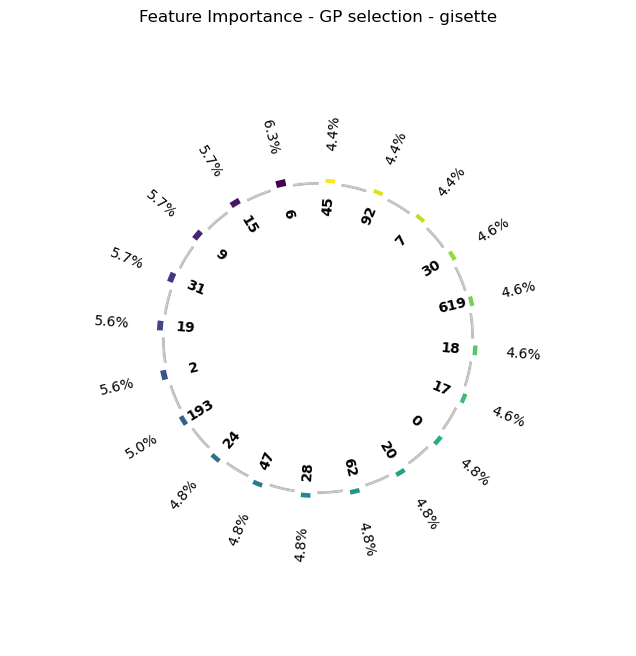

In [210]:
terminals = []
for node in gtgp.stack:
    terminals.extend(find_terminals(node))
counts = pd.value_counts(terminals)


# div = len(counts)//1
div = 2500
features = counts[:div].keys().tolist()

counts,len(np.unique(terminals))

i = 20
plot_feature_circos(features=counts[:i].keys().tolist(),
                        values  = counts[:i].values/counts[:i].sum().tolist(),
                        title = "Feature Importance - GP selection - gisette"
                        )

# select feature

In [211]:
X_train = X_train[:,features]
X_test = X_test[:,features]

# Decision Tree

In [212]:
from sklearn.tree import DecisionTreeClassifier

In [213]:
for i in range(30):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)

    num_trees = 1
    depth = clf.tree_.max_depth
    num_nodes = clf.tree_.node_count

    train_acc = accuracy_score(y_train,clf.predict(X_train))
    test_acc = accuracy_score(y_test,clf.predict(X_test))
    train_roc = roc_auc_score(y_train_one_hot.toarray(),clf.predict_proba(X_train))
    test_roc = roc_auc_score(y_test_one_hot.toarray(),clf.predict_proba(X_test))
    print(train_acc,test_acc,train_roc,test_roc)
    # with open('./benchmark_DC/'+dataset+'.csv','a') as f:
    #     s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
    #     f.writelines(s)

1.0 0.92 1.0 0.9200000000000002
1.0 0.922 1.0 0.9220000000000002
1.0 0.921 1.0 0.921
1.0 0.924 1.0 0.9239999999999999
1.0 0.921 1.0 0.921
1.0 0.921 1.0 0.921
1.0 0.919 1.0 0.919


KeyboardInterrupt: 

# XGBoost

In [214]:
import xgboost


In [215]:
for i in range(1):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    # xgb = xgboost.XGBClassifier(min_child_weight=0,max_depth=3,n_estimators=100)
    # xgb = xgboost.XGBClassifier(min_child_weight=0,max_depth=4)
    xgb = xgboost.XGBClassifier(n_estimators=100)
    xgb.fit(X_train,y_train)

    import json

    def item_generator(json_input, lookup_key):
        if isinstance(json_input, dict):
            for k, v in json_input.items():
                if k == lookup_key:
                    yield v
                else:
                    yield from item_generator(v, lookup_key)
        elif isinstance(json_input, list):
            for item in json_input:
                yield from item_generator(item, lookup_key)

    def tree_depth(json_text):
        json_input = json.loads(json_text)
        depths = list(item_generator(json_input, 'depth'))
        return max(depths) + 1 if len(depths) != 0 else 1

    train_acc = accuracy_score(y_train,xgb.predict(X_train))
    test_acc = accuracy_score(y_test,xgb.predict(X_test))
    train_roc = roc_auc_score(y_train_one_hot.toarray(),xgb.predict_proba(X_train))
    test_roc = roc_auc_score(y_test_one_hot.toarray(),xgb.predict_proba(X_test))
    print(train_acc,test_acc,train_roc,test_roc)

    booster = xgb.get_booster()

    tree_df = booster.trees_to_dataframe()
    depths = [tree_depth(x) for x in booster.get_dump(dump_format = "json")]
    num_trees = len(depths)
    depth = np.average(depths)
    num_nodes = len(tree_df)

    # with open('./benchmark_xgb/'+dataset+'.csv','a') as f:
    #     s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
    #     f.writelines(s)

1.0 0.978 1.0 0.995996


# GDBT

In [216]:
from sklearn.ensemble import GradientBoostingClassifier

In [217]:
for i in range(1):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    clf = GradientBoostingClassifier(n_estimators=1000)
    # clf = GradientBoostingClassifier()
    clf.fit(X_train,y_train)

    train_acc = accuracy_score(y_train,clf.predict(X_train))
    test_acc = accuracy_score(y_test,clf.predict(X_test))
    train_roc = roc_auc_score(y_train_one_hot.toarray(),clf.predict_proba(X_train))
    test_roc = roc_auc_score(y_test_one_hot.toarray(),clf.predict_proba(X_test))

    num_trees = len([ est for ests in clf.estimators_ for est in ests])
    depth = np.average([ max(1,est.tree_.max_depth) for ests in clf.estimators_ for est in ests])
    num_nodes = sum([ est.tree_.node_count for ests in clf.estimators_ for est in ests])

    with open('./benchmark_GBDT/'+dataset+'.csv','a') as f:
        s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
        f.writelines(s)

KeyboardInterrupt: 

# Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
for i in range(1):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[i])
    y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)

    train_acc = accuracy_score(y_train,rfc.predict(X_train))
    test_acc = accuracy_score(y_test,rfc.predict(X_test))
    train_roc = roc_auc_score(y_train_one_hot.toarray(),rfc.predict_proba(X_train))
    test_roc = roc_auc_score(y_test_one_hot.toarray(),rfc.predict_proba(X_test))
    print(train_acc,test_acc,train_roc,test_roc)


    num_trees = len(rfc.estimators_)
    depth = np.average([est.tree_.max_depth for est in rfc.estimators_])
    num_nodes = sum([est.tree_.node_count for est in rfc.estimators_])

    # with open('./benchmark_RF/'+dataset+'.csv','a') as f:
    #     s = str(train_acc)+","+str(test_acc)+","+str(train_roc)+","+str(test_roc)+","+str(num_trees)+","+str(depth)+","+str(num_nodes)+"\n"
    #     f.writelines(s)

1.0 0.966 1.0 0.992434
